# Importing libraries

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [268]:
%matplotlib inline

# Importing data

In [269]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Imm_Ach 6 DA Project 6\Snow Crab Ach 6'

In [270]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Imm_Ach 6 DA Project 6\\Snow Crab Ach 6'

In [271]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Filtered Snow Crab.csv'), index_col = False)

In [272]:
df.shape

(16450, 12)

In [273]:
df.head()

,Unnamed: 0,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile
0,0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356.0
1,1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691.0
2,3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882.0
3,4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258.0
4,5,147033,56.66667,-171.33333,1975,snow crab,male,119,5.7,2.5,91,6492.0


In [274]:
# Subsetting
df_subset = df[['id', 'latitude', 'longitude', 'year', 'bottom_depth',
       'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile']]

In [275]:
df_subset.columns

Index(['id', 'latitude', 'longitude', 'year', 'bottom_depth',
       'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile'],
      dtype='object')

In [276]:
# Converting to numeric values
df_subset2 = df_subset.apply(pd.to_numeric, errors="coerce")

In [277]:
df_subset2.dtypes

id                                     int64
latitude                             float64
longitude                            float64
year                                   int64
bottom_depth                           int64
surface_temperature                  float64
bottom_temperature                   float64
haul                                   int64
catch number/square nautical mile    float64
dtype: object

In [278]:
# Standardizing the numeric variables

sc = StandardScaler()
scaled = sc.fit_transform(df_subset2)
df_scaled = pd.DataFrame(scaled, columns=df_subset2.columns)
print(df_scaled)

             id  latitude  longitude      year  bottom_depth  \
0     -2.093296 -0.867778   1.041714 -1.912867     -0.686144   
1     -2.093431 -0.867778   0.880376 -1.912867     -0.686144   
2     -2.093701 -1.070161  -0.516482 -1.912867      1.442286   
3     -2.093836 -1.070161  -0.363634 -1.912867      1.128255   
4     -2.093971 -1.070161  -0.202294 -1.912867      0.988686   
...         ...       ...        ...       ...           ...   
16445  0.633937  0.354873   0.346378  1.694223     -1.279313   
16446  0.633802  0.166048  -0.629994  1.694223      0.779333   
16447  0.633667  0.148489  -0.464001  1.694223      0.360625   
16448  0.633532  0.142478  -0.300809  1.694223      0.081487   
16449  0.633397  0.143863  -0.139264  1.694223     -0.302328   

       surface_temperature  bottom_temperature      haul  \
0                 1.022143           -0.453027 -0.087658   
1                 0.819741           -0.277996 -0.068294   
2                -0.495868            0.363784 -0.6

# The elbow technique

In [279]:
# Number of potential clusters
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [280]:
# Rate of variation for the given cluster option
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

In [281]:
score

[-148049.99999999994,
 -111184.59198922923,
 -96187.8413543691,
 -86866.90459910712,
 -79602.33304444695,
 -74665.15803139555,
 -69838.40305363115,
 -66364.52148871464,
 -63360.16407325206]

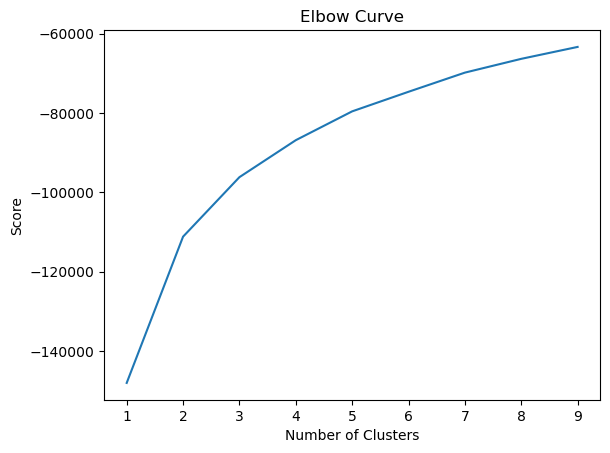

In [282]:
# Ploting the elbow curve

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## There's one more larger jump from 3 to 4 on the x-axis, after that, the curve starts to straightens out. This means that the optimal count for the clusters is 3.

# K-means clustering

In [283]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 4)

In [284]:
# Fitting the k-means object to the data

kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [285]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [286]:
df_scaled.head()

,id,latitude,longitude,year,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile,clusters
0,-2.093296,-0.867778,1.041714,-1.912867,-0.686144,1.022143,-0.453027,-0.087658,1.411731,0
1,-2.093431,-0.867778,0.880376,-1.912867,-0.686144,0.819741,-0.277996,-0.068294,2.813395,3
2,-2.093701,-1.070161,-0.516482,-1.912867,1.442286,-0.495868,0.363784,-0.629823,-0.194680,0
3,-2.093836,-1.070161,-0.363634,-1.912867,1.128255,-0.698270,0.130410,-0.610460,-0.027677,0
4,-2.093971,-1.070161,-0.202294,-1.912867,0.988686,-0.698270,0.363784,-0.591097,-0.263439,0


In [287]:
df_scaled['clusters'].value_counts()

clusters
1    5234
0    5096
2    3963
3    2157
Name: count, dtype: int64

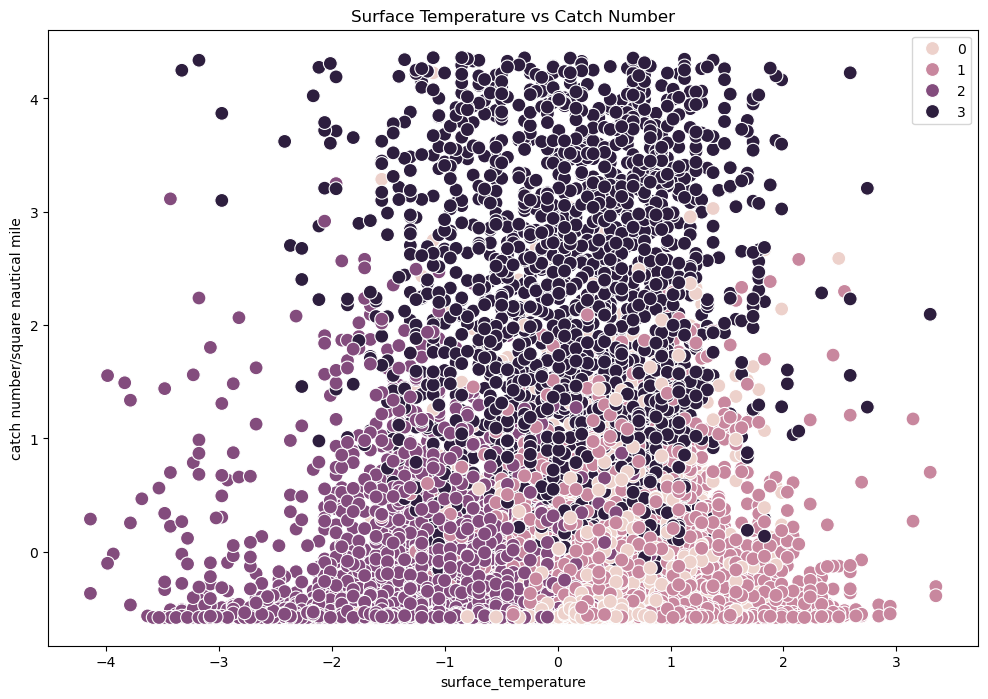

In [288]:
# Plotting the clusters for the 'catch number/square nautical mile' and 'surface_temperature' variables

plt.figure(figsize=(12,8))
cl = sns.scatterplot(x=df_scaled['surface_temperature'], y=df_scaled['catch number/square nautical mile'], hue=kmeans.labels_, s=100)
cl.grid(False)
cl.set_title('Surface Temperature vs Catch Number')
plt.xlabel('surface_temperature')
plt.ylabel('catch number/square nautical mile')
plt.show()

In [289]:
cl.figure
cl.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Surface Temp Cluster Analysis.png'))

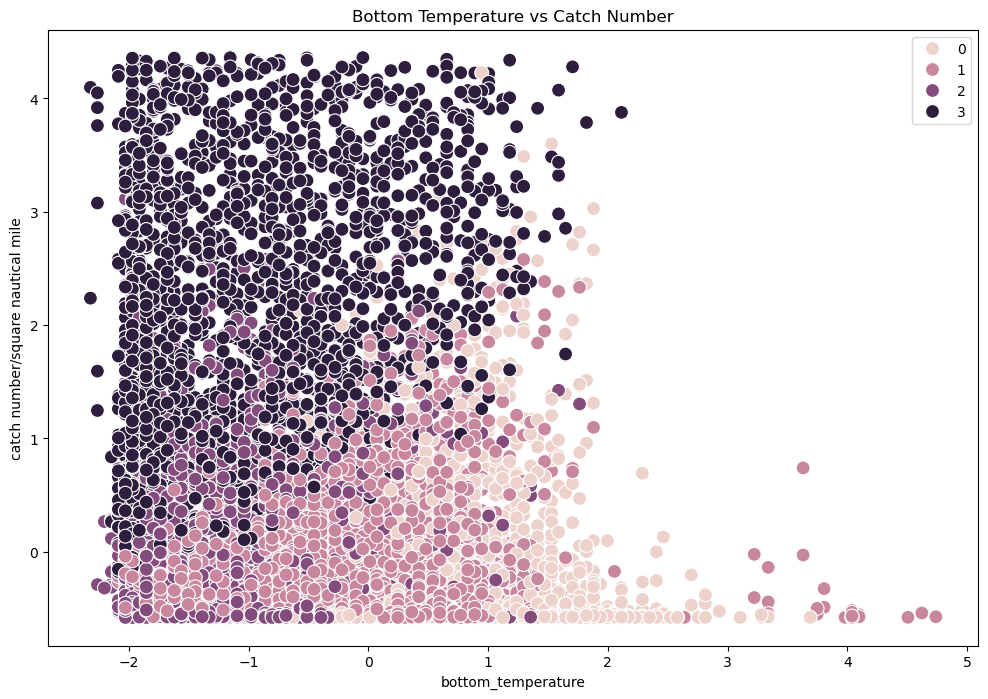

In [290]:
# Plotting the clusters for the 'catch number/square nautical mile' and 'bottom_temperature' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['bottom_temperature'], y=df_scaled['catch number/square nautical mile'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_title('Bottom Temperature vs Catch Number')
plt.xlabel('bottom_temperature')
plt.ylabel('catch number/square nautical mile')
plt.show()

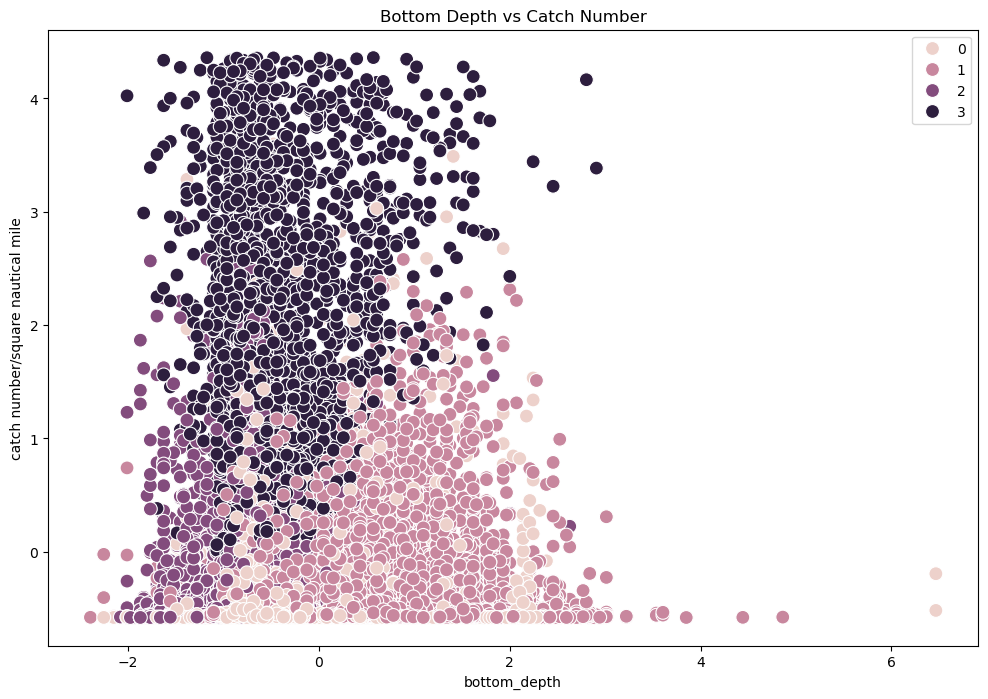

In [291]:
# Plotting the clusters for the 'catch number/square nautical mile' and 'bottom_depth' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_scaled['bottom_depth'], y=df_scaled['catch number/square nautical mile'], hue=kmeans.labels_, s=100)
ax.grid(False)
ax.set_title('Bottom Depth vs Catch Number')
plt.xlabel('bottom_depth')
plt.ylabel('catch number/square nautical mile')
plt.show()

# The 'very dark purple' cluster consists of the highest catch numbers in all three plots. And it seems this cluster is within certain ranges regarding surface temperature and bottom depth, and therefore, does not consist of many very low or very high catch number values/observations. While for surface temperature some lower and higher observations exist, regarding bottom depth there seem to be no higher or very low values.
# For bottom temperature this does not hold true though, compared to the other clusters. It can only be said that the 'very dark purple' cluster does not consist of very high bottom temperature values.

In [292]:
df_scaled.loc[df_scaled['clusters'] == 3, 'cluster'] = 'very dark purple'
df_scaled.loc[df_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
df_scaled.loc[df_scaled['clusters'] == 1, 'cluster'] = 'purple'
df_scaled.loc[df_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [293]:
df_scaled.columns

Index(['id', 'latitude', 'longitude', 'year', 'bottom_depth',
       'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile', 'clusters', 'cluster'],
      dtype='object')

In [294]:
df_scaled.groupby('cluster').agg({'surface_temperature':['mean', 'median'], 
                         'bottom_temperature':['mean', 'median'], 
                         'bottom_depth':['mean', 'median'],
                          'catch number/square nautical mile':['mean', 'median']})

surface_temperature           bottom_temperature            \
                                mean    median               mean    median   
cluster                                                                       
dark purple                -1.086602 -1.052472          -0.637701 -0.686402   
pink                        0.100394  0.161937           0.828553  0.888878   
purple                      0.663213  0.667940           0.088385  0.072066   
very dark purple            0.149902  0.212537          -1.000327 -1.211495   

                 bottom_depth           catch number/square nautical mile  \
                         mean    median                              mean   
cluster                                                                     
dark purple         -0.864734 -0.825713                         -0.265002   
pink                 0.001315 -0.232544                         -0.355311   
purple               0.824851  0.814225                         -0.280584   
very dark purple    -0.415870 -0.546574                          2.007161   

                            
                    median  
cluster                     
dark purple      -0.497124  
pink             -0.546617  
purple           -0.459603  
very dark purple  1.902795

In [295]:
df_scaled.head()

,id,latitude,longitude,year,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile,clusters,cluster
0,-2.093296,-0.867778,1.041714,-1.912867,-0.686144,1.022143,-0.453027,-0.087658,1.411731,0,pink
1,-2.093431,-0.867778,0.880376,-1.912867,-0.686144,0.819741,-0.277996,-0.068294,2.813395,3,very dark purple
2,-2.093701,-1.070161,-0.516482,-1.912867,1.442286,-0.495868,0.363784,-0.629823,-0.194680,0,pink
3,-2.093836,-1.070161,-0.363634,-1.912867,1.128255,-0.698270,0.130410,-0.610460,-0.027677,0,pink
4,-2.093971,-1.070161,-0.202294,-1.912867,0.988686,-0.698270,0.363784,-0.591097,-0.263439,0,pink


In [296]:
df_scaled['cluster'].value_counts()

cluster
purple              5234
pink                5096
dark purple         3963
very dark purple    2157
Name: count, dtype: int64

In [297]:
tb = df_scaled.groupby('cluster', as_index=False).agg({'surface_temperature':['mean', 'median'], 'catch number/square nautical mile':['mean', 'median']})

In [298]:
tb

cluster surface_temperature            \
                                   mean    median   
0       dark purple           -1.086602 -1.052472   
1              pink            0.100394  0.161937   
2            purple            0.663213  0.667940   
3  very dark purple            0.149902  0.212537   

  catch number/square nautical mile            
                               mean    median  
0                         -0.265002 -0.497124  
1                         -0.355311 -0.546617  
2                         -0.280584 -0.459603  
3                          2.007161  1.902795

In [299]:
tbl.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Cluster.csv'))

# Descriptive statistics of the clusters confirm the results and the final interpretation of the plots.

In [300]:
df_scaled.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Scaled Snow Crab.csv'))